## Assignment-1

#### Author: Tanisha Garg
#### Roll No: 2201AI40

In [9]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Step 1: Download dataset

In [10]:
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


### Step 2: Load dataset

In [11]:
data = pd.read_csv(path + "/data.csv")

### Step 3: Data preprocessing

In [12]:
# Drop irrelevant columns
data = data.drop(['id', 'Unnamed: 32'], axis=1)

# Encode target (M=1, B=0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Features & target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

### Step 4: Train/Validation/Test split

In [13]:
# First split: 15% test set
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

# Second split: 15% of train_full as validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.15, random_state=42, stratify=y_train_full
)

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}, Test samples: {len(X_test)}")

Training samples: 410, Validation samples: 73, Test samples: 86


### Step 5: Feature scaling

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Step 6: Logistic Regression with Hyperparameter Tuning

In [15]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],             # L2 regularization
    'solver': ['lbfgs']            # Optimizer
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("\nBest Hyperparameters:", grid.best_params_)


Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


### Step 7: Validation Performance

In [16]:
y_val_pred = grid.predict(X_val)
print("\nValidation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))


Validation Accuracy: 0.9726027397260274
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.96      0.96      0.96        27

    accuracy                           0.97        73
   macro avg       0.97      0.97      0.97        73
weighted avg       0.97      0.97      0.97        73



### Step 8: Final Test Performance

In [18]:
y_test_pred = grid.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.9883720930232558

Test Confusion Matrix:
 [[54  0]
 [ 1 31]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.97      0.98        32

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



### Step 9: Visualization - Confusion Matrix Heatmap

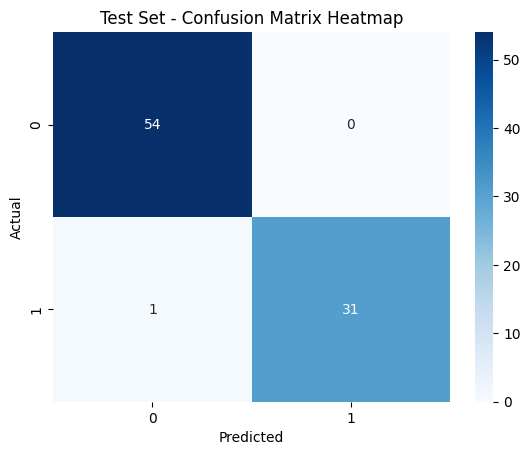

In [19]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Set - Confusion Matrix Heatmap")
plt.show()